<a href="https://colab.research.google.com/github/edisonaqp/admbio/blob/master/Movilidad_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# importación de librerias preliminares

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Índice de Movilidad

In [27]:
path = '/content/drive/MyDrive/Maestría en Ciencias de la Computación/Asesoría de Tesis/Epidemias/Datasets/Movilidad Chile/33_Nuevo_IndiceDeMovilidad.csv'

# leemos el excel
df = pd.read_csv(path)
df.head()

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
0,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.292276,0.554280,0.846555,2020-02-26
1,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.337161,0.465553,0.802714,2020-02-27
2,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.383090,0.551148,0.934238,2020-02-28
3,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.545929,0.849687,1.395616,2020-02-29
4,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.440501,0.739040,1.179541,2020-03-01


In [28]:
df.tail()

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
132021,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,4.120789,3.351299,7.472089,2021-03-26
132022,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.563041,1.472089,4.035130,2021-03-27
132023,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.394129,1.271415,3.665544,2021-03-28
132024,NaN,NaN,NaN,11302,7781.76,661.0,NaN,NaN,NaN,NaN
132025,NaN,NaN,NaN,12202,1250257.60,137.0,NaN,NaN,NaN,NaN


In [29]:
# verificar las dimensiones
df.shape

(132026, 10)

In [30]:
#eliminamos filas nulas
df.dropna(inplace=True)

In [31]:
df.shape

(132024, 10)

In [32]:
df.tail()

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
132019,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,3.833494,3.110202,6.943696,2021-03-24
132020,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,3.742541,3.086622,6.829163,2021-03-25
132021,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,4.120789,3.351299,7.472089,2021-03-26
132022,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.563041,1.472089,4.035130,2021-03-27
132023,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.394129,1.271415,3.665544,2021-03-28


In [33]:
# datos duplicados
df.duplicated().sum()

0

In [34]:
# verificar los tipos de datos
df.dtypes

,0
Region,object
Codigo region,float64
Comuna,object
Codigo comuna,int64
Superficie_km2,float64
Poblacion,float64
IM_interno,float64
IM_externo,float64
IM,float64
Fecha,object


In [35]:
# Convertir fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [36]:
df.describe()

,Codigo region,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
count,132024.000000,132024.000000,132024.000000,132024.000000,132024.000000,132024.000000,132024.000000,132024
mean,8.783615,9020.905714,2165.482985,56592.760650,2.805686,4.220363,7.026049,2020-09-07 23:20:58.462097408
min,1.000000,1101.000000,6.310000,211.000000,0.000000,0.000000,0.000000,2020-02-26 00:00:00
25%,6.000000,6109.000000,260.940000,10032.000000,1.005801,1.414254,4.100769,2020-05-31 00:00:00
50%,8.000000,8313.000000,631.380000,20223.000000,2.356014,3.298131,6.327676,2020-09-04 00:00:00
75%,13.000000,13104.000000,1638.810000,56252.000000,4.104130,5.801287,9.117080,2020-12-22 00:00:00
max,16.000000,16305.000000,48938.200000,645909.000000,25.444463,68.775152,86.446646,2021-03-28 00:00:00
std,3.846949,3817.891417,4814.069554,88987.923794,2.351750,4.143275,4.885830,NaN


In [37]:
df.nunique()

,0
Region,16
Codigo region,16
Comuna,344
Codigo comuna,344
Superficie_km2,344
Poblacion,344
IM_interno,115598
IM_externo,124324
IM,125748
Fecha,384


In [38]:
df.isnull().sum()  # Valores nulos por columna

,0
Region,0
Codigo region,0
Comuna,0
Codigo comuna,0
Superficie_km2,0
Poblacion,0
IM_interno,0
IM_externo,0
IM,0
Fecha,0


In [39]:
(df == 0).sum()    # Cuenta de valores cero por columna

,0
Region,0
Codigo region,0
Comuna,0
Codigo comuna,0
Superficie_km2,0
Poblacion,0
IM_interno,9922
IM_externo,2503
IM,1997
Fecha,0


In [40]:
# rangos
stats = df.describe(include='all').T
stats['unique'] = df.nunique()
stats[['unique', 'min', 'max']]

,unique,min,max
Region,16,NaN,NaN
Codigo region,16,1.0,16.0
Comuna,344,NaN,NaN
Codigo comuna,344,1101.0,16305.0
Superficie_km2,344,6.31,48938.2
Poblacion,344,211.0,645909.0
IM_interno,115598,0.0,25.444463
IM_externo,124324,0.0,68.775152
IM,125748,0.0,86.446646
Fecha,384,2020-02-26 00:00:00,2021-03-28 00:00:00


In [41]:
df.Region.unique()

array(['Biobío', 'Ñuble', 'Maule', 'Atacama', 'Los Ríos',
       'Arica y Parinacota', 'Aysén del General Carlos Ibáñez del Campo',
       'Metropolitana de Santiago',
       "Libertador General Bernardo O'Higgins",
       'Magallanes y de la Antártica Chilena', 'Valparaíso', 'Coquimbo',
       'Antofagasta', 'Tarapacá', 'Los Lagos', 'La Araucanía'],
      dtype=object)

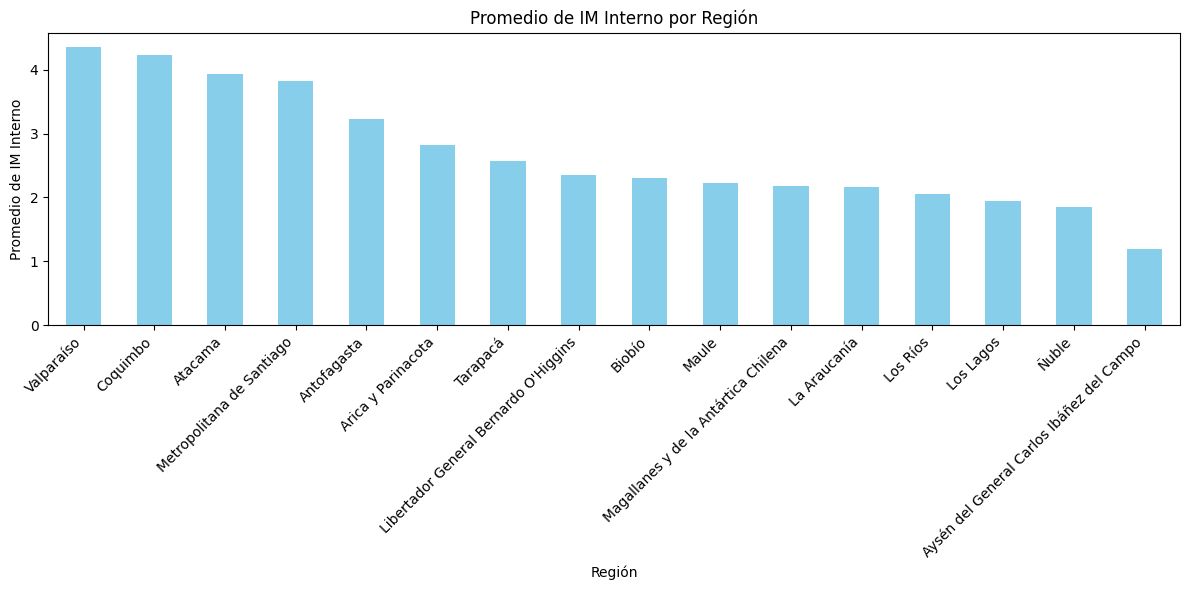

In [42]:
# Calcular el promedio de 'IM_interno' por región
im_interno_por_region = df.groupby('Region')['IM_interno'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
im_interno_por_region.plot(kind='bar', color='skyblue')
plt.title('Promedio de IM Interno por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de IM Interno')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

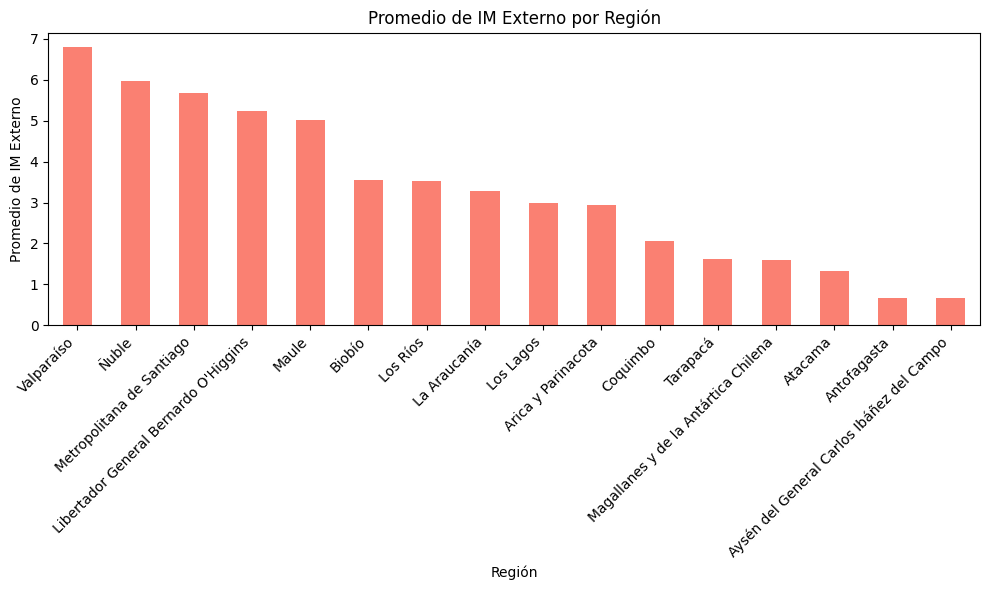

In [43]:
# Calcular el promedio de 'IM_externo' por región
im_externo_por_region = df.groupby('Region')['IM_externo'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
im_externo_por_region.plot(kind='bar', color='salmon')
plt.title('Promedio de IM Externo por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de IM Externo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

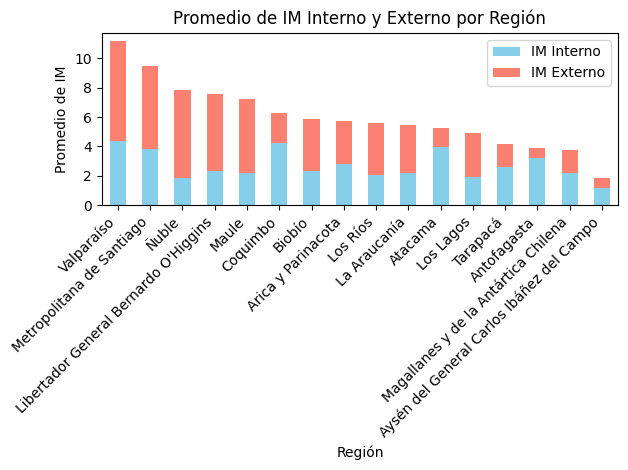

In [44]:
# Calcular el promedio de 'IM_interno' y 'IM_externo' por región
promedio_im_por_region = df.groupby('Region')[['IM_interno', 'IM_externo']].mean()

# Calcular la suma total de 'IM_interno' y 'IM_externo'
promedio_im_por_region['Total'] = promedio_im_por_region['IM_interno'] + promedio_im_por_region['IM_externo']

# Ordenar por la suma total de forma descendente
promedio_im_por_region = promedio_im_por_region.sort_values(by='Total', ascending=False)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 7))
promedio_im_por_region[['IM_interno', 'IM_externo']].plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Promedio de IM Interno y Externo por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de IM')
plt.xticks(rotation=45, ha='right')
plt.legend(['IM Interno', 'IM Externo'])
plt.tight_layout()
plt.show()

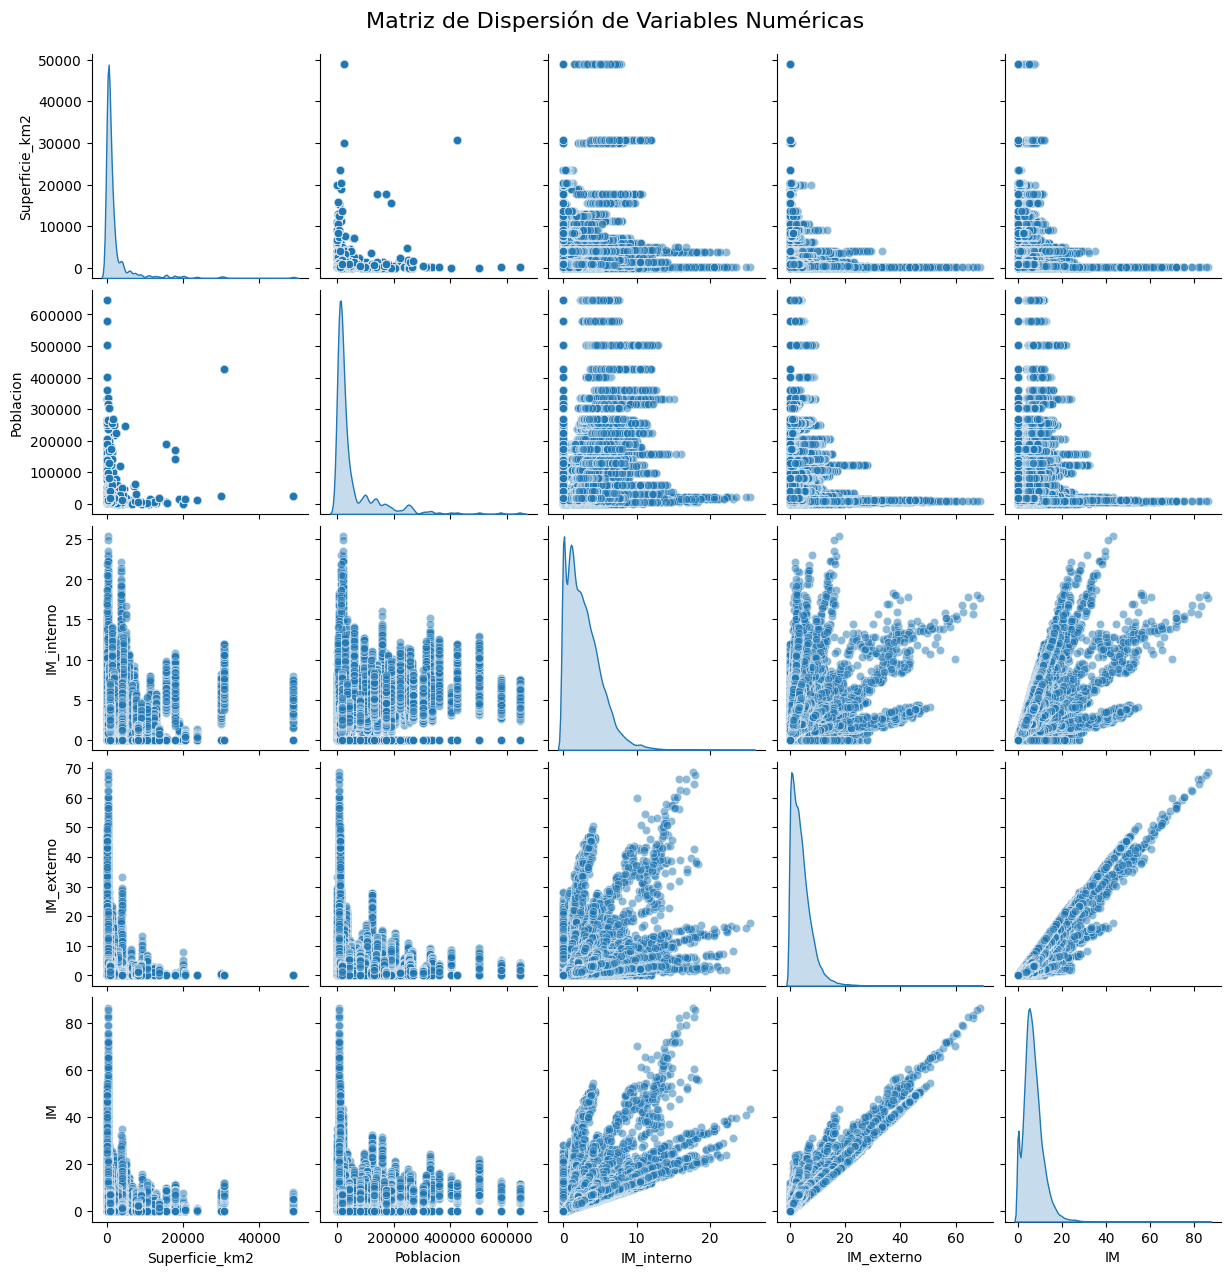

In [45]:
# Filtrar solo las columnas numéricas
df_numerico = df[['Superficie_km2', 'Poblacion', 'IM_interno', 'IM_externo', 'IM']]

# Matriz de dispersión
sns.pairplot(df_numerico, diag_kind='kde', markers='o', plot_kws={'alpha':0.5})
plt.suptitle('Matriz de Dispersión de Variables Numéricas', y=1.02, fontsize=16)
plt.show()

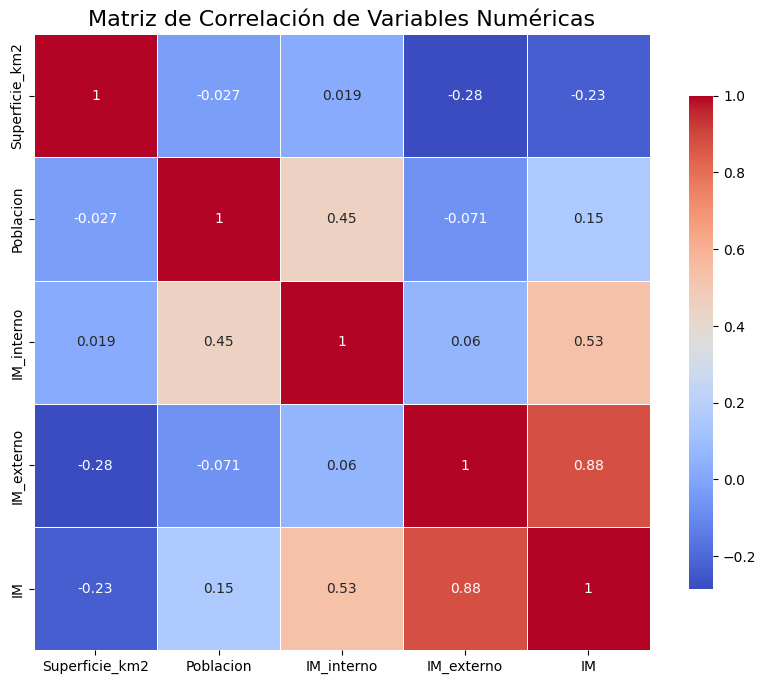

In [46]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlacion = df_numerico.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': .8})
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

# Poblacion y Viajes

In [84]:
path = '/content/drive/MyDrive/Maestría en Ciencias de la Computación/Asesoría de Tesis/Epidemias/Datasets/Movilidad Chile/40_TransporteAereo_std.csv'

# leemos el excel
df_transp_aereo = pd.read_csv(path)
df_transp_aereo.head()

,Semana,Inicio_semana,Fin_semana,Origen,Cod_region_origen,Region_origen,Destino,Cod_region_destino,Region_destino,Operaciones,Pasajeros
0,1,2020-01-01,2020-01-05,Antofagasta,2,Antofagasta,Arica,15,Arica y Parinacota,2.0,224.0
1,2,2020-01-06,2020-01-12,Antofagasta,2,Antofagasta,Arica,15,Arica y Parinacota,3.0,330.0
2,3,2020-01-13,2020-01-19,Antofagasta,2,Antofagasta,Arica,15,Arica y Parinacota,4.0,453.0
3,4,2020-01-20,2020-01-26,Antofagasta,2,Antofagasta,Arica,15,Arica y Parinacota,3.0,393.0
4,5,2020-01-27,2020-02-02,Antofagasta,2,Antofagasta,Arica,15,Arica y Parinacota,2.0,276.0


In [85]:
path = '/content/drive/MyDrive/Maestría en Ciencias de la Computación/Asesoría de Tesis/Epidemias/Datasets/Movilidad Chile/42_ViajesComunas_std.csv'

# leemos el excel
df_transp_pub = pd.read_csv(path)
df_transp_pub.head()

,Fecha,Origen,Destino,Viajes
0,2020-03-01,Cerrillos,Cerrillos,2026
1,2020-03-01,Cerrillos,Cerro Navia,31
2,2020-03-01,Cerrillos,Conchali,84
3,2020-03-01,Cerrillos,El Bosque,85
4,2020-03-01,Cerrillos,Estacion Central,1218


In [86]:
path = '/content/drive/MyDrive/Maestría en Ciencias de la Computación/Asesoría de Tesis/Epidemias/Datasets/Movilidad Chile/81_poblacion_comuna_edad.csv'

# leemos el excel
df_poblacion = pd.read_csv(path)
df_poblacion.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,3,4,5,6,7,...,71,72,73,74,75,76,77,78,79,80
0,Arica y Parinacota,15,Arica,15101.0,247552.0,3141.0,3264.0,3396.0,3665.0,3648.0,...,1587.0,1448.0,1394.0,1321.0,1241.0,1175.0,1094.0,982.0,880.0,6448.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,10.0,11.0,11.0,13.0,13.0,...,15.0,13.0,11.0,10.0,9.0,8.0,7.0,6.0,6.0,50.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,7.0,8.0,8.0,9.0,8.0,...,9.0,8.0,8.0,8.0,7.0,4.0,3.0,4.0,3.0,23.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,18.0,16.0,17.0,21.0,23.0,...,14.0,13.0,14.0,16.0,17.0,17.0,16.0,13.0,11.0,88.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
print(f'Transporte aéreo: {df_transp_aereo.shape}')
print(f'Transporte público: {df_transp_pub.shape}')
print(f'Población: {df_poblacion.shape}')

Transporte aéreo: (4699, 11)
Transporte público: (87465, 4)
Población: (362, 83)


In [88]:
#eliminamos filas nulas
df_transp_aereo.dropna(inplace=True)
df_transp_pub.dropna(inplace=True)
df_poblacion.dropna(inplace=True)

In [89]:
print(f'Transporte aéreo: {df_transp_aereo.shape}')
print(f'Transporte público: {df_transp_pub.shape}')
print(f'Población: {df_poblacion.shape}')

Transporte aéreo: (4699, 11)
Transporte público: (87465, 4)
Población: (346, 83)


In [90]:
df_transp_aereo.nunique()

,0
Semana,53
Inicio_semana,70
Fin_semana,71
Origen,17
Cod_region_origen,13
Region_origen,13
Destino,17
Cod_region_destino,13
Region_destino,13
Operaciones,130


In [91]:
df_transp_pub.nunique()

,0
Fecha,75
Origen,36
Destino,36
Viajes,6673


In [92]:
df_poblacion.nunique()

,0
Region,16
Codigo region,16
Comuna,346
Codigo comuna,346
Poblacion,346
...,...
76,238
77,237
78,230
79,221


In [70]:
df_transp_aereo.isnull().sum()

,0
Semana,0
Inicio_semana,0
Fin_semana,0
Origen,0
Cod_region_origen,0
Region_origen,0
Destino,0
Cod_region_destino,0
Region_destino,0
Operaciones,0


In [71]:
df_transp_pub.isnull().sum()

,0
Fecha,0
Origen,0
Destino,0
Viajes,0


In [93]:
df_poblacion.isnull().sum()

,0
Region,0
Codigo region,0
Comuna,0
Codigo comuna,0
Poblacion,0
...,...
76,0
77,0
78,0
79,0


In [94]:
# prompt: a la fuente de transporte público (df_transp_pub) agrégale dos columnas, Region_origen y Region_destino, las cuales se obtendrán de la tabla población (df_poblacion), del campo "Region". Los campos en común en ambas tablas son: Origen y Comuna, de las tablas df_transp_pub y df_poblacion respectivamente

# Merge the dataframes
df_transp_pub = pd.merge(df_transp_pub, df_poblacion[['Comuna', 'Region']], left_on='Origen', right_on='Comuna', how='left')
df_transp_pub = df_transp_pub.rename(columns={'Region': 'Region_origen'})
df_transp_pub = pd.merge(df_transp_pub, df_poblacion[['Comuna', 'Region']], left_on='Destino', right_on='Comuna', how='left')
df_transp_pub = df_transp_pub.rename(columns={'Region': 'Region_destino'})

# Display the updated dataframe
df_transp_pub.head()

,Fecha,Origen,Destino,Viajes,Comuna_x,Region_origen,Comuna_y,Region_destino
0,2020-03-01,Cerrillos,Cerrillos,2026,Cerrillos,Metropolitana,Cerrillos,Metropolitana
1,2020-03-01,Cerrillos,Cerro Navia,31,Cerrillos,Metropolitana,Cerro Navia,Metropolitana
2,2020-03-01,Cerrillos,Conchali,84,Cerrillos,Metropolitana,Conchali,Metropolitana
3,2020-03-01,Cerrillos,El Bosque,85,Cerrillos,Metropolitana,El Bosque,Metropolitana
4,2020-03-01,Cerrillos,Estacion Central,1218,Cerrillos,Metropolitana,Estacion Central,Metropolitana


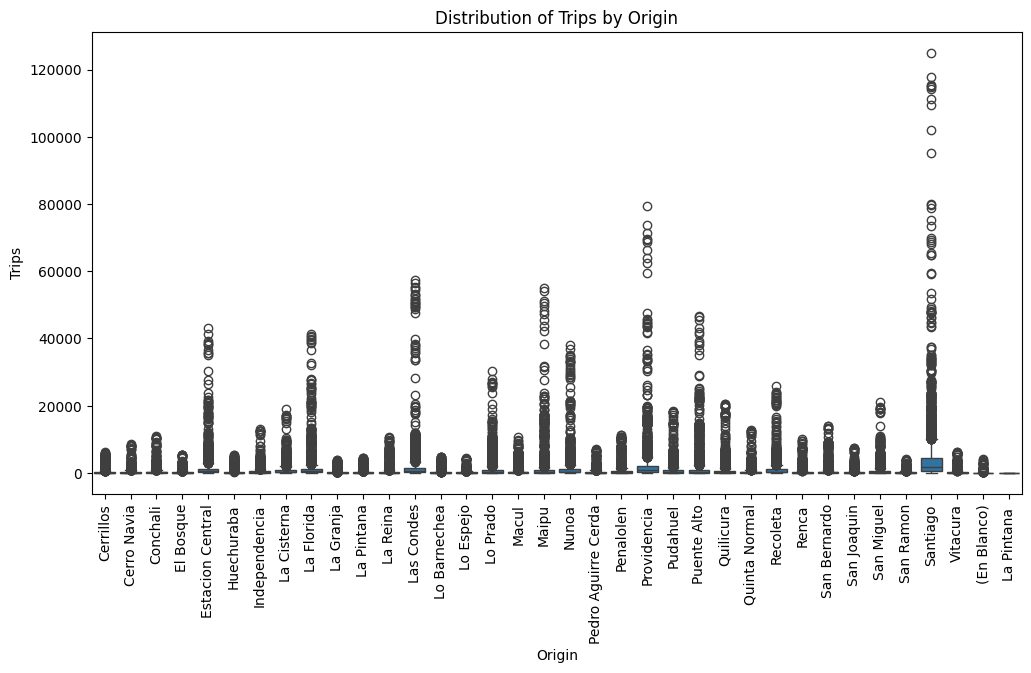

In [95]:
# @title Distribución de viajes por origen

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a pandas DataFrame called 'df_transp_pub'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Origen', y='Viajes', data=df_transp_pub)
plt.title('Distribución de viajes por origen')
plt.xlabel('Origen')
plt.ylabel('Viajes')
_ = plt.xticks(rotation=90)

In [83]:
pd.concat([df_at['Region_origen'], df_at['Region_destino']]).unique()

array(['Antofagasta', 'Biobío', 'Atacama', 'Tarapacá', 'Coquimbo',
       'Metropolitana', 'Arica y Parinacota', 'Aysén', 'Los Lagos',
       'Magallanes', 'Araucanía', 'Valparaíso', 'Los Ríos'], dtype=object)

In [82]:
pd.concat([df_pt['Origen'], df_pt['Destino']]).unique()

array(['Cerrillos', 'Cerro Navia', 'Conchali', 'El Bosque',
       'Estacion Central', 'Huechuraba', 'Independencia', 'La Cisterna',
       'La Florida', 'La Granja', 'La Pintana', 'La Reina', 'Las Condes',
       'Lo Barnechea', 'Lo Espejo', 'Lo Prado', 'Macul', 'Maipu', 'Nunoa',
       'Pedro Aguirre Cerda', 'Penalolen', 'Providencia', 'Pudahuel',
       'Puente Alto', 'Quilicura', 'Quinta Normal', 'Recoleta', 'Renca',
       'San Bernardo', 'San Joaquin', 'San Miguel', 'San Ramon',
       'Santiago', 'Vitacura', '(En Blanco)', 'La Pintana '], dtype=object)